SIAM - Wide-band Limit
=======

We calculate the Green function for a SIAM in the Wide-band limit.

The local hamiltonian on the impurity site reads

$$h_{\rm loc} = h_0 + h_{\rm int}$$

where

$$h_0 = -\mu \, (n_{\uparrow, 0} + n_{\uparrow, 0}) - h(n_{\uparrow,0} - n_{\downarrow,0})$$

$$h_{\rm int} = U n_{\uparrow, 0} n_{\downarrow, 0}$$

The bath is defined via the hybridization function

$$\Delta^{\sigma}_{0,0}(i\omega) = -i \operatorname{sgn}(\omega)\,\Gamma$$

The parameters are defined below.

In [1]:
# %load system.py
execfile('../common/util.py')

from pytriqs.gf import Gf, MeshImFreq, iOmega_n, inverse
from pytriqs.operators import c, c_dag, n
from itertools import product
from numpy import sign

# ==== System Parameters ====
beta = 5.           # Inverse temperature
mu = 2.             # Chemical potential
U = 5.              # On-site density-density interaction
h = 0.2             # Local magnetic field
Gamma = 1.          # Hybridization energy

# ==== Local Hamiltonian ====
h_0 = - mu*( n('up',0) + n('dn',0) ) - h*( n('up',0) - n('dn',0) )
h_int = U * n('up',0) * n('dn',0)
h_loc = h_0 + h_int

# ==== Green function structure ====
gf_struct = [ ['up',[0]], ['dn',[0]] ]

# ==== Hybridization Function ====
n_iw = 20
iw_mesh = MeshImFreq(beta, 'Fermion', n_iw)
Delta = Gf_from_struct(mesh=iw_mesh, struct=gf_struct)
Delta << 0.

for iw in Delta['up'].mesh:
    Delta['up'][iw] = -1j * Gamma * sign(iw.imag)
    Delta['dn'][iw] = -1j * Gamma * sign(iw.imag)


Results
====

In [2]:
from pytriqs.plot.mpl_interface import oplot, plt
%matplotlib inline

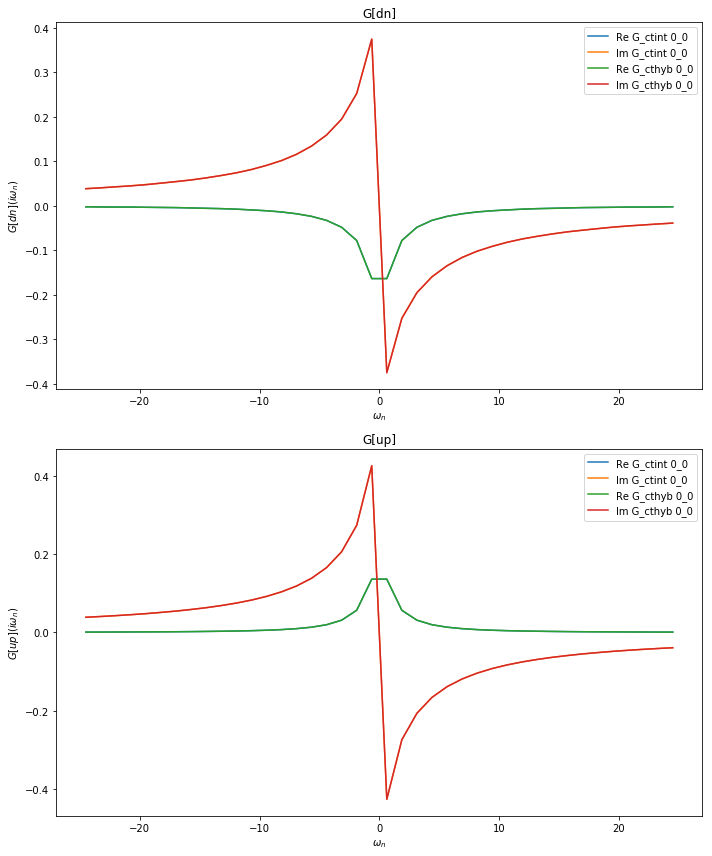

In [3]:
# %load common/plot.py
from pytriqs.archive import HDFArchive
from pytriqs.gf import Gf
from pytriqs.plot.mpl_interface import oplot, plt
from glob import glob
from os.path import basename

# === Load Green function for every solver

file_lst = glob('results/*.h5')
solver_lst, G = [], {}

for f in file_lst:
    solver = basename(f).strip('.h5')
    solver_lst.append(solver)
    G[solver] = HDFArchive(f,'r')['G']

# === For every block, plot Green functions of all solvers

block_lst = list(G[solver_lst[0]].indices)
n_blocks = len(block_lst)

plt.subplots(n_blocks,1,figsize=(10,6*n_blocks))

for i, block in enumerate(block_lst,1):
    fig = plt.subplot(n_blocks,1,i)
    fig.set_title("G[" + block + "]")
    for solver in solver_lst:
        oplot(G[solver][block], name = "G_%s" % solver)
    plt.xlabel("$\omega_n$")
    plt.ylabel("$G[" + block + "](i\omega_n)$")

plt.tight_layout()
plt.savefig("plot.png", dpi = 200)
plt.show()


Deviations
======

We present a table containing deviations between the different solvers measured via

$$||G_{\rm Solver_1} - G_{\rm Solver_2}||_\infty$$

In [4]:
import numpy as np

for block in block_lst:
    deviations = [[ np.amax(np.abs(G[s1][block].data - G[s2][block].data)) for s1 in solver_lst ] \
                    for s2 in solver_lst ]
    
    print "\t\t    Deviations for Block " + block
    print "\t\t -----------------------------------"

    row_format ="{:>15}" * (len(solver_lst) + 1)
    print row_format.format("", *solver_lst)
    row_format ="{:>15}" + "{:>15.2E}" * len(solver_lst)
    for solver, row in zip(solver_lst, deviations):
        print row_format.format(solver, *row)
        
    print "\n\n"

		    Deviations for Block dn
		 -----------------------------------
                         ctint          cthyb
          ctint       0.00E+00       4.23E-04
          cthyb       4.23E-04       0.00E+00



		    Deviations for Block up
		 -----------------------------------
                         ctint          cthyb
          ctint       0.00E+00       2.96E-04
          cthyb       2.96E-04       0.00E+00



